In [ ]:
import pandas as pd #python for data analysis librari yang fokus pada analisis data ex; manipulasi data, persiapan data, pembersihan data
import numpy as np #numerical phyton librari yg berfokus pada scientific computing
import matplotlib.pyplot as plt #librari yang berfokus pada visualisasi data seperti membuat plot grafik
import plotly.express as px
import plotly.graph_objects as go #librari untuk membuat plot dengan bahasa python
import matplotlib.patches as mpatches
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import seaborn as sns  
sns.set(color_codes = True)
sns.set(style="whitegrid")
import plotly.figure_factory as ff
from plotly.colors import n_colors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/covid-variants.csv') # memuat file csv sebagai data frame
df.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [ ]:
df = df.rename(columns = {"num_sequences_total" : "Total"})
df.head()

,location,date,variant,num_sequences,perc_sequences,Total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [ ]:
df.shape

(100416, 6)

In [ ]:
df.isnull().sum()

location          0
date              0
variant           0
num_sequences     0
perc_sequences    0
Total             0
dtype: int64

In [ ]:
df.dtypes

location           object
date               object
variant            object
num_sequences       int64
perc_sequences    float64
Total               int64
dtype: object

In [ ]:
df.dtypes

location           object
date               object
variant            object
num_sequences       int64
perc_sequences    float64
Total               int64
dtype: object

In [ ]:
df['variant'].unique()

array(['Alpha', 'B.1.1.277', 'B.1.1.302', 'B.1.1.519', 'B.1.160',
       'B.1.177', 'B.1.221', 'B.1.258', 'B.1.367', 'B.1.620', 'Beta',
       'Delta', 'Epsilon', 'Eta', 'Gamma', 'Iota', 'Kappa', 'Lambda',
       'Mu', 'Omicron', 'S:677H.Robin1', 'S:677P.Pelican', 'others',
       'non_who'], dtype=object)

In [ ]:
df=df[df["variant"]!="non_who"]

In [ ]:
omicron=df[df["variant"]=="Omicron"]
delta=df[df["variant"]=="Delta"]
others=df[(df["variant"]!="Omicron") & (df["variant"]!="Delta")]

**DI** **DUNIA**

In [ ]:
omicron_world=omicron.groupby("date").sum()
omicron_world['date']=omicron_world.index
delta_world=delta.groupby("date").sum()
delta_world["date"]=delta_world.index
others_world=others.groupby("date").sum()
others_world["date"]=others_world.index

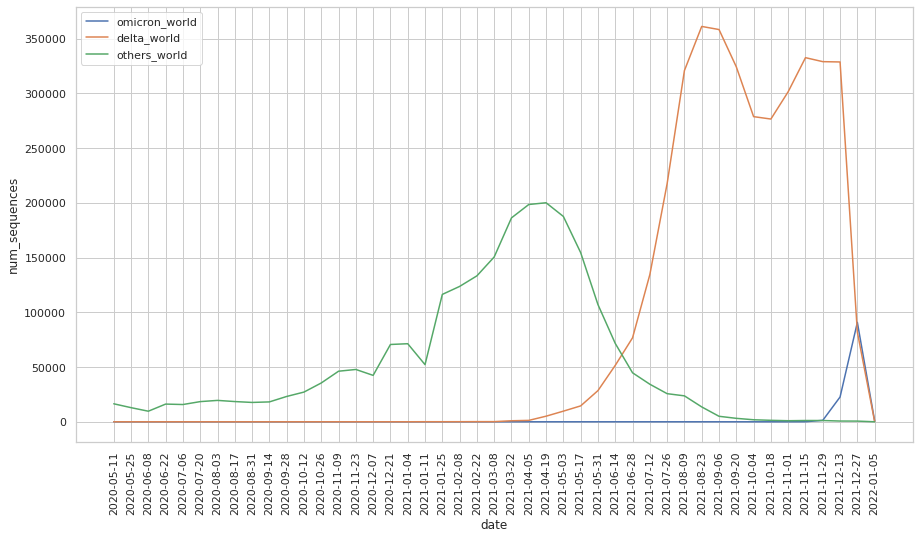

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=omicron_world['date'],y=omicron_world['num_sequences'],label="omicron_world")
sns.lineplot(x=delta_world['date'], y=delta_world['num_sequences'],label="delta_world")
sns.lineplot(x=others_world['date'], y=others_world['num_sequences'],label="others_world")
plt.show()

**DI INDONESIA**

In [ ]:
omicron_india=omicron[omicron["location"]=="Indonesia"]
delta_india=delta[delta["location"]=="Indonesia"]
others_india=others[others['location']=="Indonesia"]
others_group=others_india.groupby("date").sum()
others_group["date"]=others_group.index

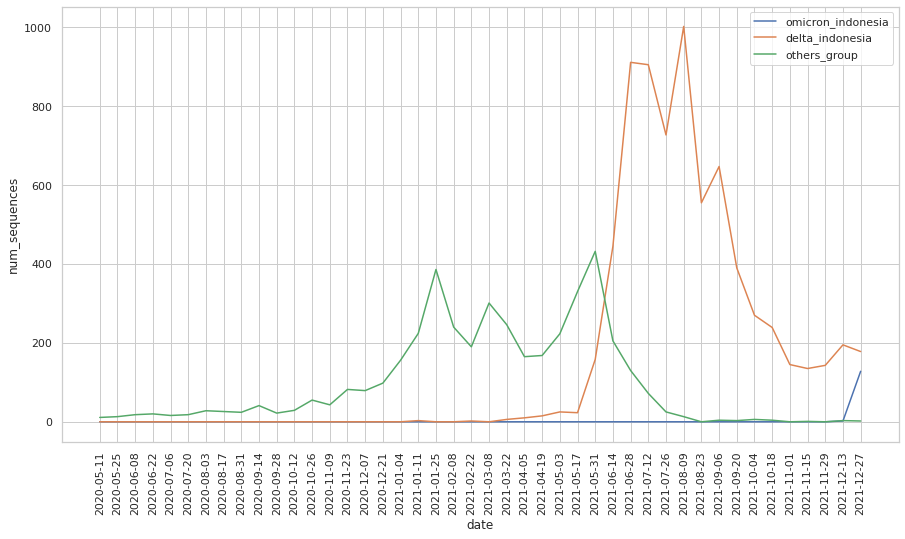

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=omicron_india['date'],y=omicron_india['num_sequences'],label="omicron_indonesia")
sns.lineplot(x=delta_india['date'],y=delta_india['num_sequences'],label="delta_indonesia")
sns.lineplot(x=others_group['date'],y=others_group['num_sequences'],label="others_group")
plt.show()

**INDIA**

In [ ]:
omicron_US=omicron[omicron["location"]=="India"]
delta_US=delta[delta["location"]=="India"]
others_US=others[others['location']=="India"]
others_group2=others_US.groupby("date").sum()
others_group2["date"]=others_group2.index

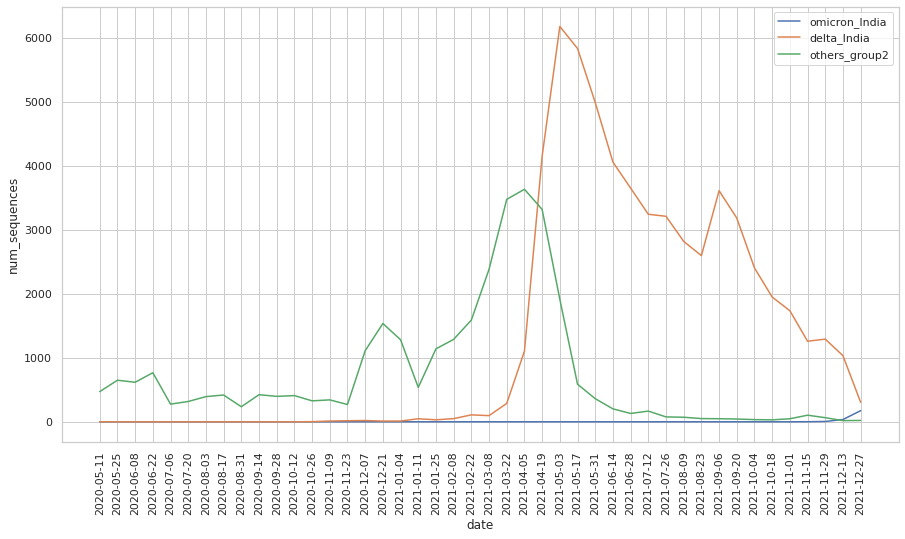

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=omicron_US['date'],y=omicron_US['num_sequences'],label="omicron_India")
sns.lineplot(x=delta_US['date'],y=delta_US['num_sequences'],label="delta_India")
sns.lineplot(x=others_group2['date'],y=others_group2['num_sequences'],label="others_group2")
plt.show()

**PERBANDINGAN PENYEBARAN OMICRON DI DUNIA DAN DI INDONESIA**

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=omicron_world['date'], y=omicron_world['num_sequences'],label="omicron_world")
sns.lineplot(x=omicron_india['date'], y=omicron_india['num_sequences'],label="omicron_Indonesia")
plt.show()

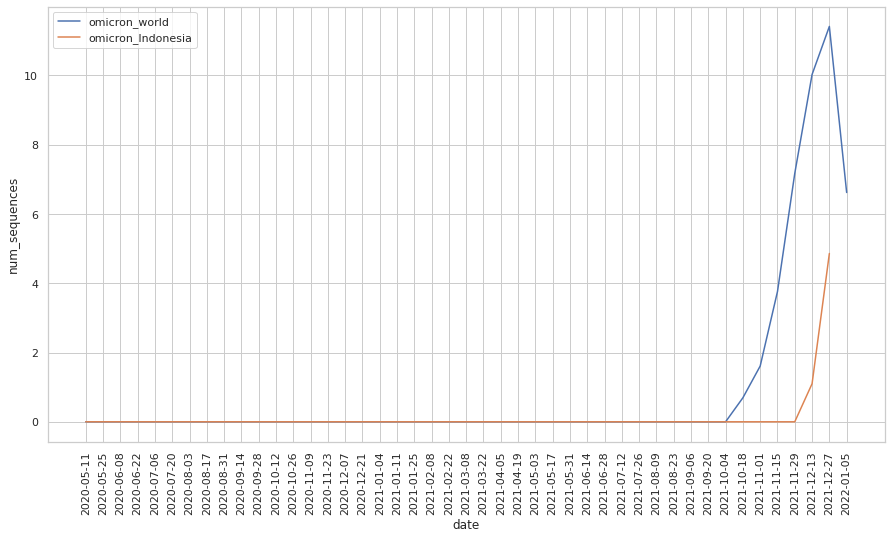

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=omicron_world['date'], y=np.log1p(omicron_world['num_sequences']),label="omicron_world")
sns.lineplot(x=omicron_india['date'], y=np.log1p(omicron_india['num_sequences']),label="omicron_Indonesia")
plt.show()

**PERBANDINGAN PENYEBARAN OMICRON DI DUNIA DAN DI INDIA**

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=omicron_world['date'], y=omicron_world['num_sequences'],label="omicron_world")
sns.lineplot(x=omicron_US['date'], y=omicron_US['num_sequences'],label="omicron_india")
plt.show()

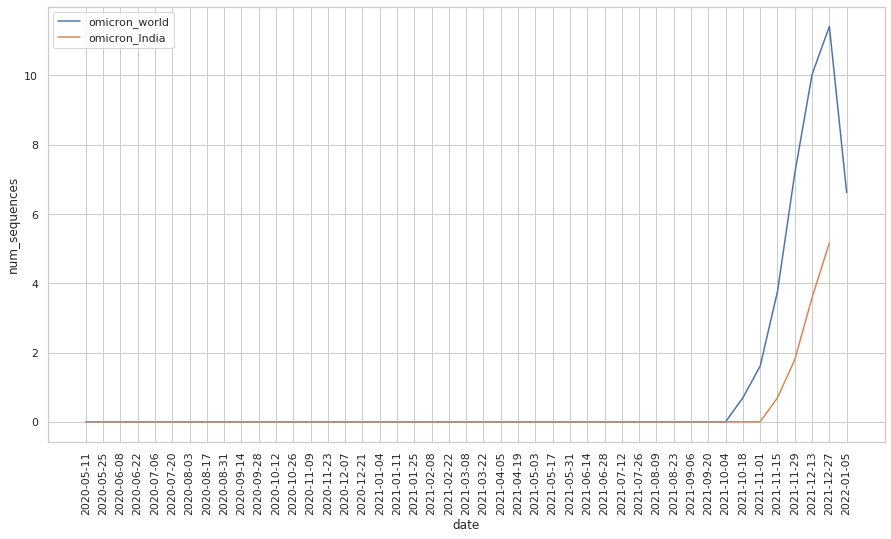

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=omicron_world['date'], y=np.log1p(omicron_world['num_sequences']),label="omicron_world")
sns.lineplot(x=omicron_US['date'], y=np.log1p(omicron_US['num_sequences']),label="omicron_India")
plt.show()

**PERBANDINGAN PENYEBARAN OMICRON DI INDONESIA DAN DI INDIA**

---



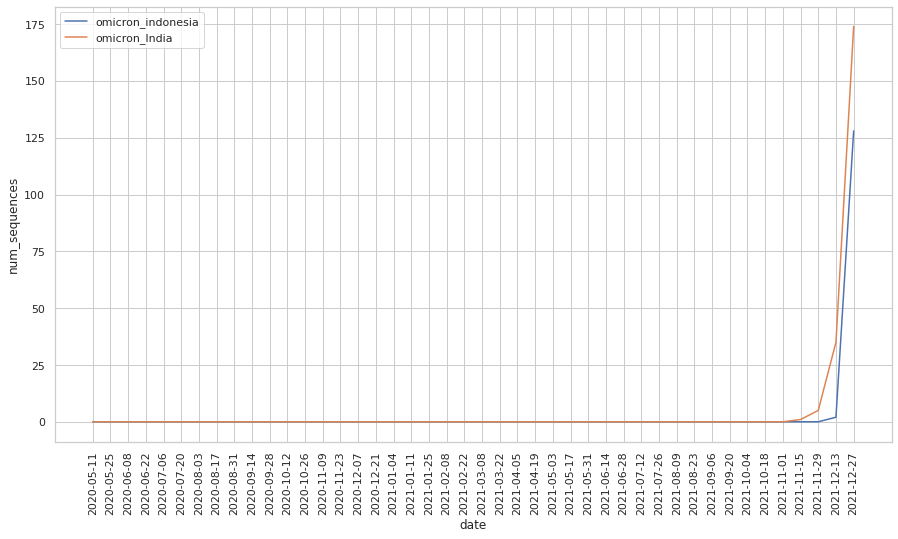

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=omicron_india['date'], y=omicron_india['num_sequences'],label="omicron_indonesia")
sns.lineplot(x=omicron_US['date'], y=omicron_US['num_sequences'],label="omicron_India")
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=omicron_india['date'], y=np.log1p(omicron_india['num_sequences']),label="omicron_Indonesia")
sns.lineplot(x=omicron_US['date'], y=np.log1p(omicron_US['num_sequences']),label="omicron_India")
plt.show()


**Others world vs INDONESIA** 

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=others_group['date'], y=others_group['num_sequences'],label="others_Indonesia")
sns.lineplot(x=others_world['date'], y=others_world['num_sequences'],label="others_world")
plt.show()

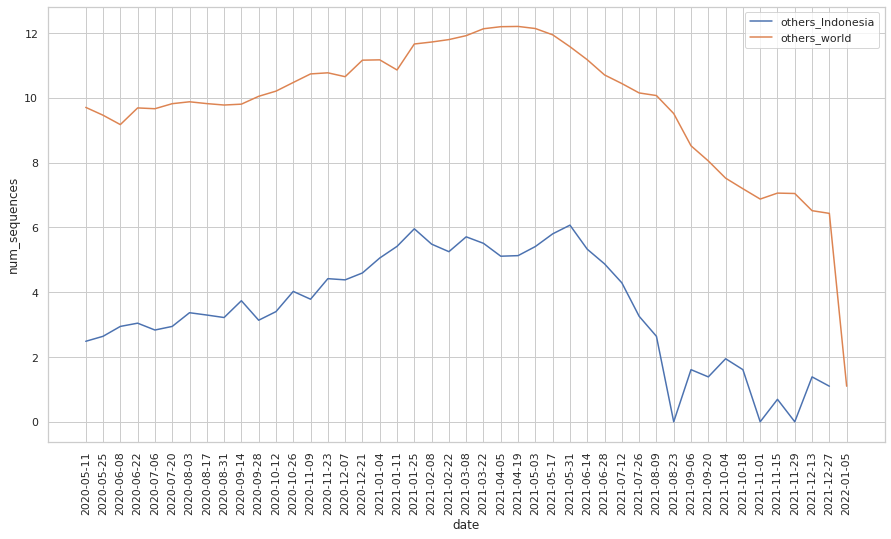

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.lineplot(x=others_group['date'], y=np.log1p(others_group['num_sequences']),label="others_Indonesia")
sns.lineplot(x=others_world['date'], y=np.log1p(others_world['num_sequences']),label="others_world")
plt.show()

**CONFIRMED CASSES IN INDONESIA**

In [ ]:
df_indonesia = df[df["location"]=="Indonesia"]
df_indonesia.head()

,location,date,variant,num_sequences,perc_sequences,Total
37416,Indonesia,2020-05-11,Alpha,0,0.0,11
37417,Indonesia,2020-05-11,B.1.1.277,0,0.0,11
37418,Indonesia,2020-05-11,B.1.1.302,0,0.0,11
37419,Indonesia,2020-05-11,B.1.1.519,0,0.0,11
37420,Indonesia,2020-05-11,B.1.160,0,0.0,11


In [ ]:
df_indonesia.shape

(1012, 6)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df = df.rename(columns = {"num_sequences_total" : "Total"})
df.head()

,location,date,variant,num_sequences,perc_sequences,Total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [ ]:
df_indonesia.shape

(1012, 6)

In [ ]:
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
df_ind_omi = df_indonesia.groupby('date')['Total'].sum().reset_index()
df_ind_omi.head()

,date,Total
0,2020-05-11,253
1,2020-05-25,299
2,2020-06-08,414
3,2020-06-22,460
4,2020-07-06,368


In [ ]:
df_indonesia = df[df["location"]=="Indonesia"]
df_indonesia.head()

,location,date,variant,num_sequences,perc_sequences,Total
37416,Indonesia,2020-05-11,Alpha,0,0.0,11
37417,Indonesia,2020-05-11,B.1.1.277,0,0.0,11
37418,Indonesia,2020-05-11,B.1.1.302,0,0.0,11
37419,Indonesia,2020-05-11,B.1.1.519,0,0.0,11
37420,Indonesia,2020-05-11,B.1.160,0,0.0,11


In [ ]:
df_indonesia.shape

(1012, 6)

In [ ]:


import plotly.graph_objs as go
import plotly.express as px



In [ ]:
# Grouping by the date of the case
df_ind_omi = df_indonesia.groupby('date')['Total'].sum().reset_index()
df_ind_omi.head()

,date,Total
0,2020-05-11,253
1,2020-05-25,299
2,2020-06-08,414
3,2020-06-22,460
4,2020-07-06,368


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = df_ind_omi['date'],
                         y = df_ind_omi['Total'],
                         mode = 'lines',
                         name = 'Indonesia',
                         marker_color = 'DarkGreen'))

fig.update_layout(title = '<b> Total Confirmed Omicron Cases in Indonesia from 2020 to 2022<b>',
                  title_x = 0.5,
                  title_font = dict(size = 18, color = 'Darkred'),
                  template = 'plotly_white')

fig.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:


import datetime as dt
omi_datetime = pd.to_datetime(df_ind_omi['date'])
df_ind_omi['datetime'] = omi_datetime
df_ind_omi['datetime']=df_ind_omi['datetime'].map(dt.datetime.toordinal)
df_ind_omi



,date,Total,datetime
0,2020-05-11,253,737556
1,2020-05-25,299,737570
2,2020-06-08,414,737584
3,2020-06-22,460,737598
4,2020-07-06,368,737612
5,2020-07-20,414,737626
6,2020-08-03,644,737640
7,2020-08-17,598,737654
8,2020-08-31,552,737668
9,2020-09-14,943,737682


In [ ]:
model = LinearRegression()
model.fit(df_ind_omi[["datetime"]], df_ind_omi["Total"])

LinearRegression()

In [ ]:
july = dt.date(2022,7,1)
print(july)
new_date = pd.DataFrame([july], columns=['date'])
new_date['datetime'] = pd.to_datetime(new_date['date'])
new_date['datetime']=new_date['datetime'].map(dt.datetime.toordinal)
new_date

2022-07-01


,date,datetime
0,2022-07-01,738337


In [ ]:
new_date['Total'] = model.predict(new_date[["datetime"]])

In [ ]:
df_ind_omi = df_ind_omi.append(new_date, ignore_index=True)
df_ind_omi

,date,Total,datetime
0,2020-05-11,253.000000,737556
1,2020-05-25,299.000000,737570
2,2020-06-08,414.000000,737584
3,2020-06-22,460.000000,737598
4,2020-07-06,368.000000,737612
5,2020-07-20,414.000000,737626
6,2020-08-03,644.000000,737640
7,2020-08-17,598.000000,737654
8,2020-08-31,552.000000,737668
9,2020-09-14,943.000000,737682


In [ ]:
print(model.coef_)
print(model.intercept_)
print(model.predict(df_ind_omi[['datetime']]))

[21.04534919]
-15522406.323378073
[-2.82757979e+02  1.18769093e+01  3.06511798e+02  6.01146687e+02
  8.95781575e+02  1.19041646e+03  1.48505135e+03  1.77968624e+03
  2.07432113e+03  2.36895602e+03  2.66359091e+03  2.95822580e+03
  3.25286068e+03  3.54749557e+03  3.84213046e+03  4.13676535e+03
  4.43140024e+03  4.72603513e+03  4.87335257e+03  5.16798746e+03
  5.46262235e+03  5.75725724e+03  6.05189213e+03  6.34652701e+03
  6.64116190e+03  6.93579679e+03  7.23043168e+03  7.52506657e+03
  7.81970146e+03  8.11433635e+03  8.40897124e+03  8.70360612e+03
  8.99824101e+03  9.29287590e+03  9.58751079e+03  9.88214568e+03
  1.01767806e+04  1.04714155e+04  1.07660503e+04  1.10606852e+04
  1.13553201e+04  1.16499550e+04  1.19445899e+04  1.22392248e+04
  1.61536597e+04]


In [ ]:


fig = go.Figure()

fig.add_trace(go.Scatter(x = df_ind_omi['date'],
                         y = df_ind_omi['Total'],
                         mode = 'lines',
                         name = 'Omicron in Indonesia',
                         marker_color = 'Black'))
fig.add_traces(go.Scatter(x=df_ind_omi['date'], y=model.predict(df_ind_omi[['datetime']]), name='Regression Fit'))

fig.update_layout(title = '<b> Prediction of Omicron Cases in Indonesia on July 2022<b>',
                  title_x = 0.5,
                  title_font = dict(size = 18, color = 'Green'),
                  template = 'plotly_white')

fig.show()

